In [1]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-white.csv'

In [3]:
import pandas as pd

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

red_wine['color'] = 1
white_wine['color'] = 0

In [4]:
wine = pd.concat([red_wine, white_wine])

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0


In [10]:
[1. if grade > 5 else 0. for grade in wine['quality']]

[0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 13)

In [13]:
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [14]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

In [15]:
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.7371560515682124, 0.7276923076923076)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve

In [18]:
print("accuracy_score", accuracy_score(y_test, y_pred_test))
print("recall_score", recall_score(y_test, y_pred_test))
print("precision_score", precision_score(y_test, y_pred_test))
print("roc_auc_score", roc_auc_score(y_test, y_pred_test))
print("f1_score", f1_score(y_test, y_pred_test))

accuracy_score 0.7276923076923076
recall_score 0.7849331713244229
precision_score 0.7849331713244229
roc_auc_score 0.706931994467243
f1_score 0.7849331713244229


In [21]:
wine_tree.predict_proba(X_test)[:, 1]

array([0.93442623, 0.36149514, 0.36149514, ..., 0.72099853, 0.36149514,
       0.72099853])

In [22]:
import matplotlib.pyplot as plt

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_proba)

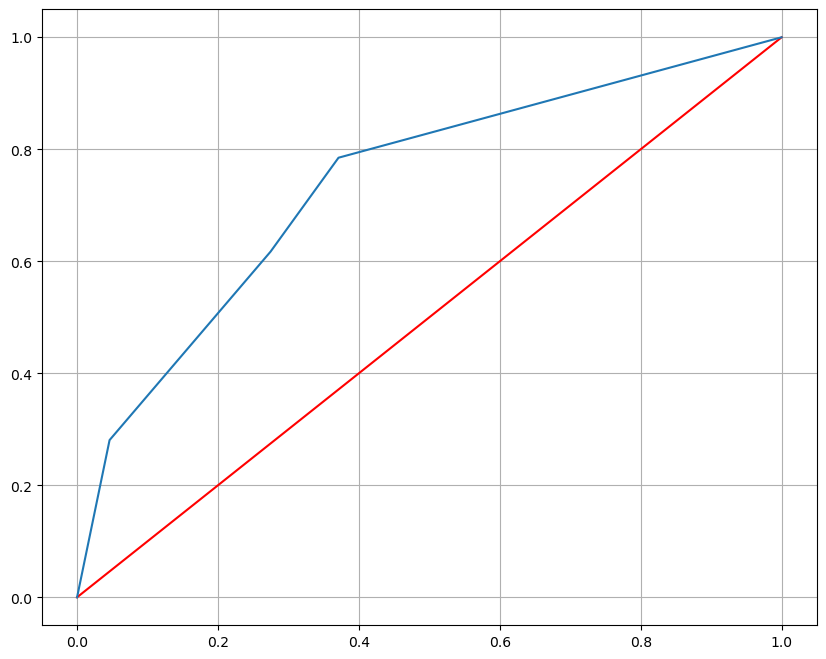

In [23]:
plt.figure(figsize = (10, 8))
plt.plot([0, 1], [0, 1], 'r')
plt.plot(fpr, tpr)
plt.grid()
plt.show()